# CDC Health Risk

## No need to run Every Time : Data Cleaning & Manipulation : Merge & Reduce columns

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from google.colab import drive

drive.mount('/content/drive')
# Make sure to replace 'path/to/your/file.csv' with the actual path to your file in Google Drive from shared
df = pd.read_csv('/content/heart_2022_no_nans.csv')
print(df.shape)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
(44033, 40)


In [ ]:
df.isna().sum() # No NANs

,0
State,0
Sex,0
GeneralHealth,0
PhysicalHealthDays,0
MentalHealthDays,0
LastCheckupTime,0
PhysicalActivities,0
SleepHours,0
RemovedTeeth,0
HadHeartAttack,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246022 entries, 0 to 246021
Data columns (total 40 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   State                      246022 non-null  object 
 1   Sex                        246022 non-null  object 
 2   GeneralHealth              246022 non-null  object 
 3   PhysicalHealthDays         246022 non-null  float64
 4   MentalHealthDays           246022 non-null  float64
 5   LastCheckupTime            246022 non-null  object 
 6   PhysicalActivities         246022 non-null  object 
 7   SleepHours                 246022 non-null  float64
 8   RemovedTeeth               246022 non-null  object 
 9   HadHeartAttack             246022 non-null  object 
 10  HadAngina                  246022 non-null  object 
 11  HadStroke                  246022 non-null  object 
 12  HadAsthma                  246022 non-null  object 
 13  HadSkinCancer              24

In [ ]:
df.describe()

,PhysicalHealthDays,MentalHealthDays,SleepHours,HeightInMeters,WeightInKilograms,BMI
count,246022.000000,246022.000000,246022.000000,246022.000000,246022.000000,246022.000000
mean,4.119026,4.167140,7.021331,1.705150,83.615179,28.668136
std,8.405844,8.102687,1.440681,0.106654,21.323156,6.513973
min,0.000000,0.000000,1.000000,0.910000,28.120000,12.020000
25%,0.000000,0.000000,6.000000,1.630000,68.040000,24.270000
50%,0.000000,0.000000,7.000000,1.700000,81.650000,27.460000
75%,3.000000,4.000000,8.000000,1.780000,95.250000,31.890000
max,30.000000,30.000000,24.000000,2.410000,292.570000,97.650000


In [ ]:
# Columns to drop
drop_cols = [
    'LastCheckupTime', 'RemovedTeeth',
    'HIVTesting', 'FluVaxLast12' ,'PneumoVaxEver' ,'TetanusLast10Tdap',
  'HighRiskLastYear','HeightInMeters', 'WeightInKilograms'
]
df = df.drop(columns=drop_cols)

In [ ]:
# Combine SmokerStatus and ECigaretteUsage into one column
def map_smoking_status(row):
    # First assign e-cigarette usage level
    if row['ECigaretteUsage'] == 'Use them every day':
        e_cig_score = 2
    elif row['ECigaretteUsage'] == 'Use them some days':
        e_cig_score = 1
    else:
        e_cig_score = 0

    # Map smoker status into base levels
    if row['SmokerStatus'] == 'Never smoked':
        smoker_score = 0
    elif row['SmokerStatus'] == 'Former smoker':
        smoker_score = 1
    elif row['SmokerStatus'] == 'Current smoker - now smokes some days':
        smoker_score = 2
    elif row['SmokerStatus'] == 'Current smoker - now smokes every day':
        smoker_score = 3
    else:
        smoker_score = 0  # Default for safety

    # Combine both to get final smoking_status
    if e_cig_score > 0:
        # Dual use, add e-cig intensity
        return smoker_score + e_cig_score
    else:
        # Just regular smoker status
        return smoker_score

# Apply function to new column
df['smoking_status'] = df.apply(map_smoking_status, axis=1)

# Check value counts to validate
print(df['smoking_status'].value_counts())

df=df.drop(columns=['SmokerStatus','ECigaretteUsage'])

# Combine all 'Difficulty' columns into a single binary column
difficulty_cols = [
    'DifficultyConcentrating', 'DifficultyWalking',
    'DifficultyDressingBathing', 'DifficultyErrands'
]

# Create new column indicating if any of the difficulties exist
df['diff_day_2_day_activity'] = df[difficulty_cols].apply(lambda x: 1 if 'Yes' in x.values else 0, axis=1)

# Drop the original columns
df = df.drop(columns=difficulty_cols)

print(df['diff_day_2_day_activity'].value_counts())

smoking_status
0    144190
1     65439
3     23539
2      9962
4      2170
5       722
Name: count, dtype: int64
diff_day_2_day_activity
0    190075
1     55947
Name: count, dtype: int64


In [ ]:
df.shape

(246022, 27)

In [ ]:
df.columns

Index(['State', 'Sex', 'GeneralHealth', 'PhysicalHealthDays',
       'MentalHealthDays', 'PhysicalActivities', 'SleepHours',
       'HadHeartAttack', 'HadAngina', 'HadStroke', 'HadAsthma',
       'HadSkinCancer', 'HadCOPD', 'HadDepressiveDisorder', 'HadKidneyDisease',
       'HadArthritis', 'HadDiabetes', 'DeafOrHardOfHearing',
       'BlindOrVisionDifficulty', 'ChestScan', 'RaceEthnicityCategory',
       'AgeCategory', 'BMI', 'AlcoholDrinkers', 'CovidPos', 'smoking_status',
       'diff_day_2_day_activity'],
      dtype='object')

In [ ]:
# Club 'HadHeartAttack', 'HadStroke', 'HadAngina' the heart disease types into one predictor
df['AnyCardioEvent'] = df[['HadHeartAttack', 'HadStroke', 'HadAngina']].max(axis=1)
df=df.drop(columns=['HadHeartAttack', 'HadStroke', 'HadAngina'])

In [ ]:
df.isna().sum()

,0
State,0
Sex,0
GeneralHealth,0
PhysicalHealthDays,0
MentalHealthDays,0
PhysicalActivities,0
SleepHours,0
HadAsthma,0
HadSkinCancer,0
HadCOPD,0


In [ ]:
df = df.drop_duplicates()
df.shape

(245954, 25)

In [ ]:
df.to_csv('./heart_2022_no_nans_cleaned_HP.csv', index=False)

In [ ]:
df.head(5)

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,PhysicalActivities,SleepHours,HadAsthma,HadSkinCancer,HadCOPD,...,BlindOrVisionDifficulty,ChestScan,RaceEthnicityCategory,AgeCategory,BMI,AlcoholDrinkers,CovidPos,smoking_status,diff_day_2_day_activity,AnyCardioEvent
0,Alabama,Female,Very good,4.0,0.0,Yes,9.0,No,No,No,...,No,No,"White only, Non-Hispanic",Age 65 to 69,27.99,No,No,1,0,No
1,Alabama,Male,Very good,0.0,0.0,Yes,6.0,No,No,No,...,No,No,"White only, Non-Hispanic",Age 70 to 74,30.13,No,No,1,0,No
2,Alabama,Male,Very good,0.0,0.0,No,8.0,No,No,No,...,Yes,Yes,"White only, Non-Hispanic",Age 75 to 79,31.66,Yes,Yes,1,1,No
3,Alabama,Female,Fair,5.0,0.0,Yes,9.0,No,Yes,No,...,No,No,"White only, Non-Hispanic",Age 80 or older,31.32,No,Yes,0,1,No
4,Alabama,Female,Good,3.0,15.0,Yes,5.0,No,No,No,...,No,No,"White only, Non-Hispanic",Age 80 or older,33.07,No,No,0,0,No


## Pre-Process Data : Column Encoding


In [61]:
import pandas as pd
df_cleaned=pd.read_csv('/content/heart_2022_no_nans_cleaned_HP.csv')

In [62]:
df_cleaned.PhysicalActivities.value_counts()

,count
PhysicalActivities,
Yes,172626
No,48830


In [63]:
numerical_cols = df_cleaned.select_dtypes(include=['number']).columns
categorical_cols = [
    col for col in df_cleaned.columns  # Iterate through column names
    if col not in numerical_cols  # Compare column names
]


print("Categorical Columns: ",categorical_cols)

Categorical Columns:  ['State', 'Sex', 'GeneralHealth', 'PhysicalActivities', 'HadAsthma', 'HadSkinCancer', 'HadCOPD', 'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis', 'HadDiabetes', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty', 'ChestScan', 'RaceEthnicityCategory', 'AgeCategory', 'AlcoholDrinkers', 'CovidPos', 'AnyCardioEvent']


In [64]:
for col in categorical_cols:
    unique_values = df_cleaned[col].unique()
    print(f"Unique values for {col}: {unique_values}")

Unique values for State: ['Alabama' 'Alaska' 'Arizona' 'Arkansas' 'California' 'Colorado'
 'Connecticut' 'Delaware' 'District of Columbia' 'Florida' 'Georgia'
 'Hawaii' 'Idaho' 'Illinois' 'Indiana' 'Iowa' 'Kansas' 'Kentucky'
 'Louisiana' 'Maine' 'Maryland' 'Massachusetts' 'Michigan' 'Minnesota'
 'Mississippi' 'Missouri' 'Montana' 'Nebraska' 'Nevada' 'New Hampshire'
 'New Jersey' 'New Mexico' 'New York' 'North Carolina' 'North Dakota'
 'Ohio' 'Oklahoma' 'Oregon' 'Pennsylvania' 'Rhode Island' 'South Carolina'
 'South Dakota' 'Tennessee' 'Texas' 'Utah' 'Vermont' 'Virginia'
 'Washington']
Unique values for Sex: ['Female' 'Male']
Unique values for GeneralHealth: ['Very good' 'Fair' 'Good' 'Excellent' 'Poor']
Unique values for PhysicalActivities: ['Yes' 'No']
Unique values for HadAsthma: ['No' 'Yes']
Unique values for HadSkinCancer: ['No' 'Yes']
Unique values for HadCOPD: ['No' 'Yes']
Unique values for HadDepressiveDisorder: ['No' 'Yes']
Unique values for HadKidneyDisease: ['No' 'Yes']
Uniqu

In [65]:
import pandas as pd

# Binary columns (Yes/No -> 1/0)
binary_columns = [
    'PhysicalActivities', 'HadAsthma', 'HadSkinCancer', 'HadCOPD',
    'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis',
    'DeafOrHardOfHearing', 'BlindOrVisionDifficulty', 'ChestScan',
    'AlcoholDrinkers', 'AnyCardioEvent'
]

for col in binary_columns:
    df_cleaned[col] = df_cleaned[col].map({'Yes': 1, 'No': 0})

print(df_cleaned.head(5))



     State     Sex GeneralHealth  PhysicalHealthDays  MentalHealthDays  \
0  Alabama  Female     Very good                 4.0               0.0   
1  Alabama    Male     Very good                 0.0               0.0   
2  Alabama    Male     Very good                 0.0               0.0   
3  Alabama  Female          Fair                 5.0               0.0   
4  Alabama  Female          Good                 3.0              15.0   

   PhysicalActivities  SleepHours  HadAsthma  HadSkinCancer  HadCOPD  ...  \
0                   1         9.0          0              0        0  ...   
1                   1         6.0          0              0        0  ...   
2                   0         8.0          0              0        0  ...   
3                   1         9.0          0              1        0  ...   
4                   1         5.0          0              0        0  ...   

   BlindOrVisionDifficulty  ChestScan     RaceEthnicityCategory  \
0                        

In [66]:
# Sex Mapping (Binary)
sex_mapping = {
    'Female': 0,
    'Male': 1
}
df_cleaned['Sex'] = df_cleaned['Sex'].map(sex_mapping)

# GeneralHealth Mapping (Ordinal - from Excellent to Poor)
general_health_mapping = {
    'Excellent': 4,
    'Very good': 3,
    'Good': 2,
    'Fair': 1,
    'Poor': 0
}
df_cleaned['GeneralHealth'] = df_cleaned['GeneralHealth'].map(general_health_mapping)

# HadDiabetes Mapping (Multi-category)
had_diabetes_mapping = {
    'No': 0,
    'No, pre-diabetes or borderline diabetes': 1,
    'Yes': 2,
    'Yes, but only during pregnancy (female)': 3
}
df_cleaned['HadDiabetes'] = df_cleaned['HadDiabetes'].map(had_diabetes_mapping)

# RaceEthnicityCategory Mapping (Nominal/Label Encoding)
race_mapping = {
    'White only, Non-Hispanic': 4,
    'Black only, Non-Hispanic': 0,
    'Other race only, Non-Hispanic': 3,
    'Multiracial, Non-Hispanic': 2,
    'Hispanic': 1
}
df_cleaned['RaceEthnicityCategory'] = df_cleaned['RaceEthnicityCategory'].map(race_mapping)

# AgeCategory Mapping (Ordinal)
age_mapping = {
    'Age 18 to 24': 0,
    'Age 25 to 29': 1,
    'Age 30 to 34': 2,
    'Age 35 to 39': 3,
    'Age 40 to 44': 4,
    'Age 45 to 49': 5,
    'Age 50 to 54': 6,
    'Age 55 to 59': 7,
    'Age 60 to 64': 8,
    'Age 65 to 69': 9,
    'Age 70 to 74': 10,
    'Age 75 to 79': 11,
    'Age 80 or older': 12
}
df_cleaned['AgeCategory'] = df_cleaned['AgeCategory'].map(age_mapping)

# CovidPos Mapping (Combine "home test positive" into 1 with "Yes")
covid_mapping = {
    'No': 0,
    'Yes': 1,
    'Tested positive using home test without a health professional': 1
}
df_cleaned['CovidPos'] = df_cleaned['CovidPos'].map(covid_mapping)

# Get unique states and sort them
sorted_states = sorted(df_cleaned['State'].unique())
# Create a mapping dictionary (state -> index based on alphabetical order)
state_mapping = {state: idx for idx, state in enumerate(sorted_states)}
# Apply the mapping to the 'State' column
df_cleaned['State'] = df_cleaned['State'].map(state_mapping)

# Check encoding
print(df_cleaned.head())

#dropna
df_cleaned = df_cleaned.dropna()

   State  Sex  GeneralHealth  PhysicalHealthDays  MentalHealthDays  \
0      0    0              3                 4.0               0.0   
1      0    1              3                 0.0               0.0   
2      0    1              3                 0.0               0.0   
3      0    0              1                 5.0               0.0   
4      0    0              2                 3.0              15.0   

   PhysicalActivities  SleepHours  HadAsthma  HadSkinCancer  HadCOPD  ...  \
0                   1         9.0          0              0        0  ...   
1                   1         6.0          0              0        0  ...   
2                   0         8.0          0              0        0  ...   
3                   1         9.0          0              1        0  ...   
4                   1         5.0          0              0        0  ...   

   BlindOrVisionDifficulty  ChestScan  RaceEthnicityCategory  AgeCategory  \
0                        0          0  

In [67]:
df_cleaned.isna().sum() # no nans

,0
State,0
Sex,0
GeneralHealth,0
PhysicalHealthDays,0
MentalHealthDays,0
PhysicalActivities,0
SleepHours,0
HadAsthma,0
HadSkinCancer,0
HadCOPD,0


In [68]:
heart_risk_data=df_cleaned
# First, convert all column names to lowercase so that the replacements can match properly.
df_cleaned.columns = [col.lower() for col in df_cleaned.columns]

# Now, replace specific substrings to ensure consistent snake_case formatting.
heart_risk_data.columns = [
    col.replace("generalhealth", "general_health")
       .replace("physicalhealthdays", "physical_health_days")
       .replace("mentalhealthdays", "mental_health_days")
       .replace("physicalactivities", "physical_activities")
       .replace("sleephours", "sleep_hours")
       .replace("hadasthma", "had_asthma")
       .replace("hadskincancer", "had_skin_cancer")
       .replace("hadcopd", "had_copd")
       .replace("haddepressivedisorder", "had_depressive_disorder")
       .replace("hadkidneydisease", "had_kidney_disease")
       .replace("hadarthritis", "had_arthritis")
       .replace("haddiabetes", "had_diabetes")
       .replace("deaforhardofhearing", "deaf_or_hard_of_hearing")
       .replace("blindorvisiondifficulty", "blind_or_vision_difficulty")
       .replace("chestscan", "chest_scan")
       .replace("raceethnicitycategory", "race_ethnicity_category")
       .replace("agecategory", "age_category")
       .replace("alcoholdrinkers", "alcohol_drinkers")
       .replace("covidpos", "covid_pos")
       .replace("anycardioevent", "any_cardio_event")
    for col in heart_risk_data.columns
]

# Print the updated column names to verify the changes
print("Updated Columns:")
print(heart_risk_data.columns.tolist())

Updated Columns:
['state', 'sex', 'general_health', 'physical_health_days', 'mental_health_days', 'physical_activities', 'sleep_hours', 'had_asthma', 'had_skin_cancer', 'had_copd', 'had_depressive_disorder', 'had_kidney_disease', 'had_arthritis', 'had_diabetes', 'deaf_or_hard_of_hearing', 'blind_or_vision_difficulty', 'chest_scan', 'race_ethnicity_category', 'age_category', 'bmi', 'alcohol_drinkers', 'covid_pos', 'smoking_status', 'diff_day_2_day_activity', 'any_cardio_event']


# Correlation Analysis

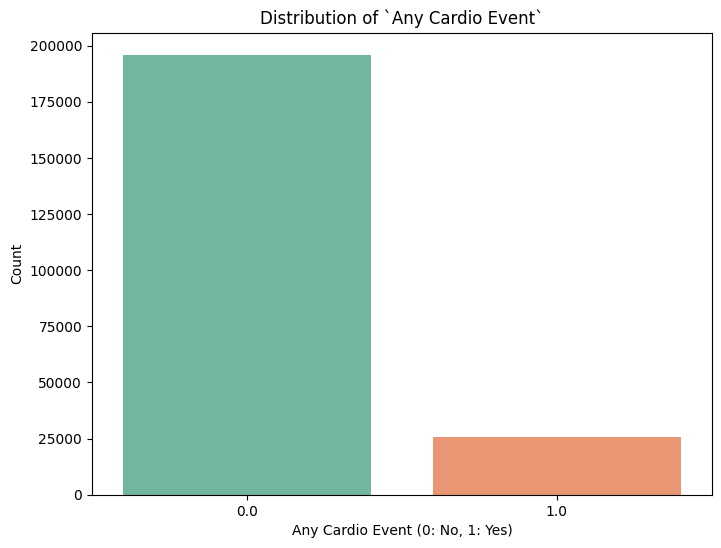

In [51]:
import matplotlib.pyplot as plt
# Assuming 'heart_risk_data' DataFrame is available from the previous code
plt.figure(figsize=(8, 6))
sns.countplot(x='any_cardio_event', data=heart_risk_data,palette='Set2')
plt.title('Distribution of `Any Cardio Event`')
plt.xlabel('Any Cardio Event (0: No, 1: Yes)')
plt.ylabel('Count')
plt.show()


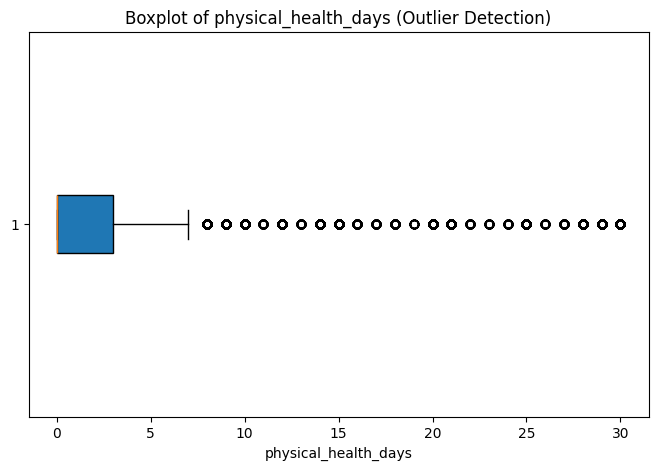

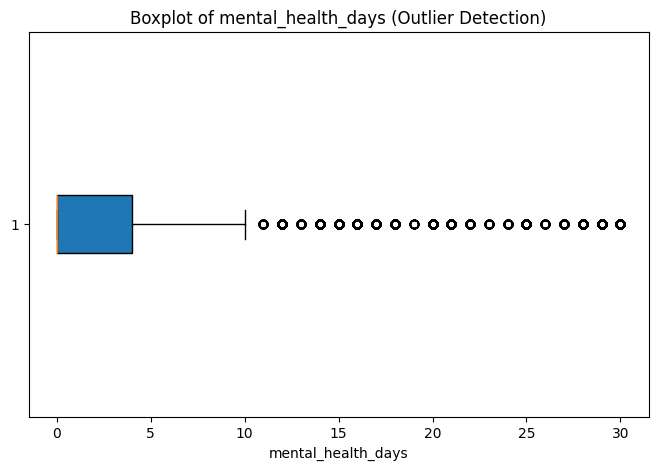

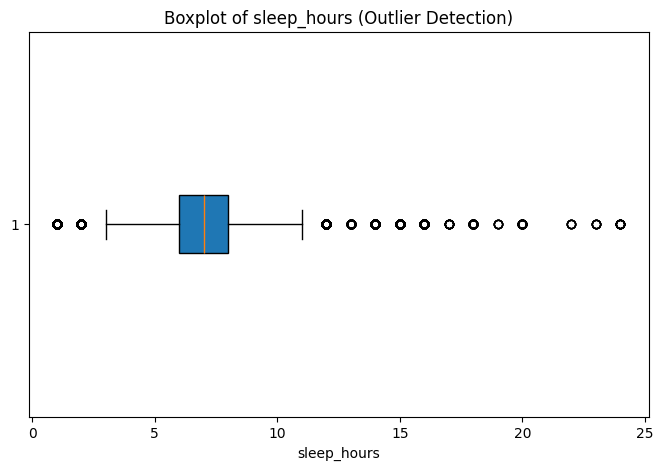

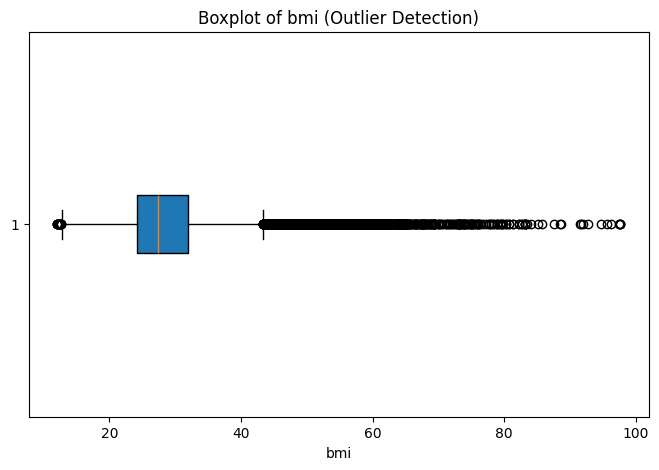

In [ ]:
# Specify the columns you want to analyze
columns_to_analyze = ['physical_health_days', 'mental_health_days', 'sleep_hours', 'bmi']

# Loop through each numerical column and create a boxplot to visualize outliers
for col in columns_to_analyze:
    plt.figure(figsize=(8, 5))
    plt.boxplot(heart_risk_data[col], vert=False, patch_artist=True)
    plt.title(f'Boxplot of {col} (Outlier Detection)')
    plt.xlabel(col)
    plt.show()  # Display the plot

any_cardio_event              1.000000
age_category                  0.253476
alcohol_drinkers             -0.100967
blind_or_vision_difficulty    0.104917
bmi                           0.046423
covid_pos                    -0.033625
deaf_or_hard_of_hearing       0.132562
diff_day_2_day_activity       0.198904
general_health               -0.253475
had_arthritis                 0.178730
had_asthma                    0.044304
had_copd                      0.176489
had_depressive_disorder       0.039587
had_diabetes                  0.175910
had_kidney_disease            0.153972
had_skin_cancer               0.083333
mental_health_days            0.034705
physical_activities          -0.113204
physical_health_days          0.183599
race_ethnicity_category       0.028570
sex                           0.061966
sleep_hours                   0.016026
smoking_status                0.065180
state                        -0.002390
Name: any_cardio_event, dtype: float64


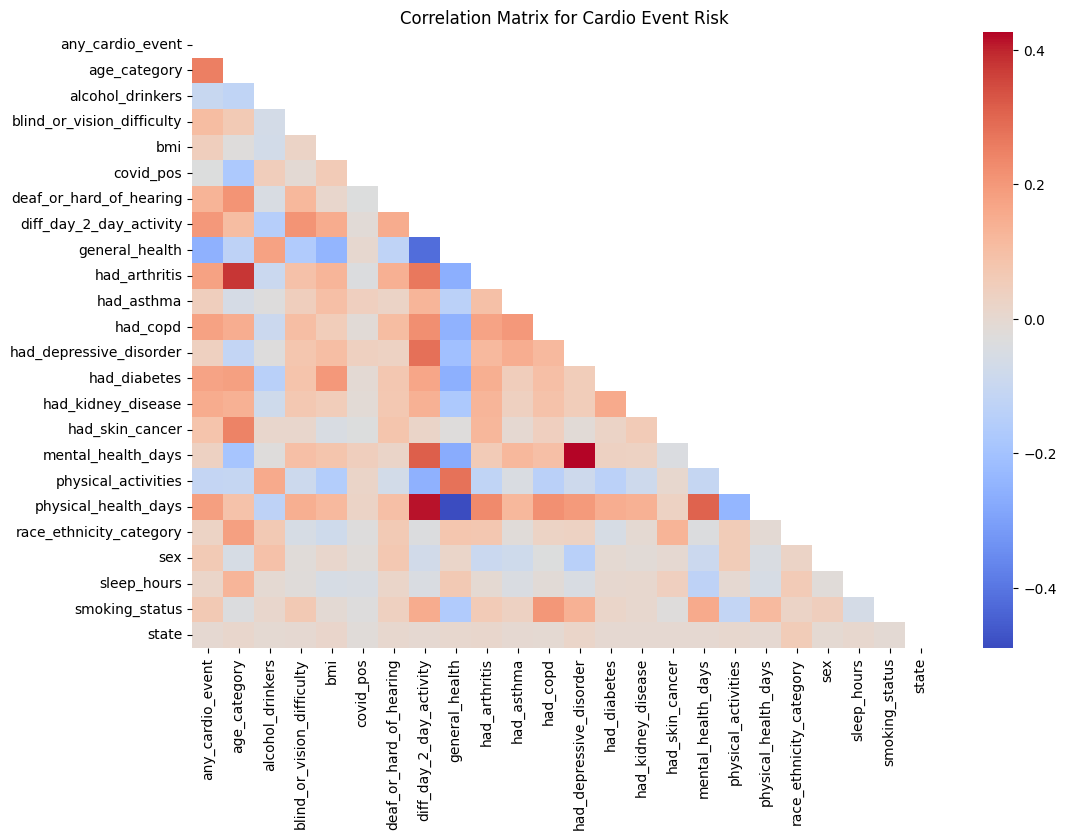

In [ ]:
# Select numerical features and the target variable
heart_risk_data.drop(columns=['chest_scan'], inplace=True)
numerical_features = heart_risk_data.select_dtypes(include=['number']).columns
numerical_features = numerical_features.difference(['any_cardio_event'])
target_variable = 'any_cardio_event'


# Calculate the correlation matrix
correlation_matrix = heart_risk_data[[target_variable] + numerical_features.tolist()].corr()

# Print the correlation of 'AnyCardioEvent' with all other variables
print(correlation_matrix['any_cardio_event'])

# Plot the heatmap with a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', mask=mask)
plt.title('Correlation Matrix for Cardio Event Risk')
plt.show()

# Hypothesis Test

## Demographic Factors

Unique Age Categories:
[ 9 10 11 12  6  4  8  7  5  3  1  2  0]


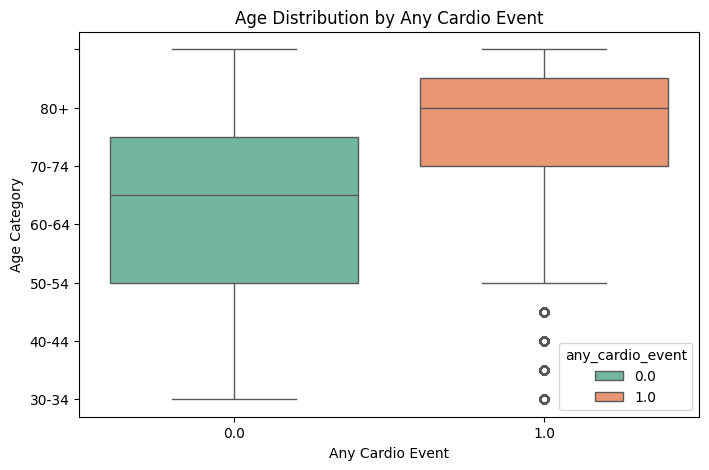

In [ ]:
#Hypothesis 1: Older individuals are at a higher risk of experiencing a cardiovascular event.
# Boxplot for Age Category vs. Any Cardio Event
# AgeCategory Mapping (Ordinal)

# Create a dictionary to map the detailed age categories to simpler labels
age_mapping_plot = {
    0: "18-24",
    1: "25-29",
    2: "30-34",
    3: "35-39",
    4: "40-44",
    5: "45-49",
    6: "50-54",
    7: "55-59",
    8: "60-64",
    9: "65-69",
    10: "70-74",
    11: "75-79",
    12: "80+"
}

# Replace the detailed age categories with the simpler labels
heart_risk_data["age_category"] = heart_risk_data["age_category"].replace(age_mapping)

# Display the unique age categories after mapping to verify the changes
print("Unique Age Categories:")
print(heart_risk_data["age_category"].unique())

plt.figure(figsize=(8, 5))
sns.boxplot(x=heart_risk_data["any_cardio_event"],
            y=heart_risk_data["age_category"],
            hue=heart_risk_data["any_cardio_event"],
            palette="Set2")
plt.title("Age Distribution by Any Cardio Event")
plt.xlabel("Any Cardio Event")
plt.ylabel("Age Category")


# Get current y-tick locations and labels
y_ticks, y_ticklabels = plt.yticks()

# Create a list of desired age range labels
age_range_labels = [label for value, label in age_mapping_plot.items() if value in y_ticks]

age_range_labels
# Set the updated y-axis tick labels
plt.gca().set_yticklabels(age_range_labels)

plt.show()


plt.show()

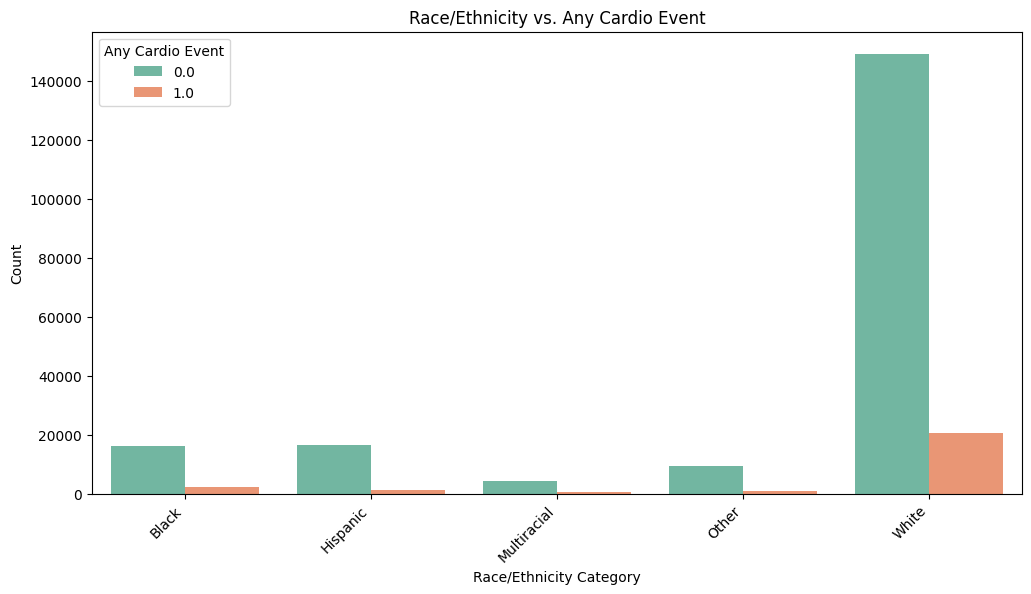

Percentage Distribution of Race/Ethnicity in Each Cardio Event Group (%):


any_cardio_event  race_ethnicity_category
0.0               4                          76.219858
                  1                           8.468193
                  0                           8.255378
                  3                           4.821761
                  2                           2.234811
1.0               4                          80.827127
                  0                           8.235986
                  1                           4.852999
                  3                           3.763230
                  2                           2.320659
Name: proportion, dtype: float64

In [ ]:
# Hypothesis 2: Race/Ethnicity may be associated with the risk of cardiovascular events.
# Create a count plot to visualize race/ethnicity distribution across cardio event groups
plt.figure(figsize=(12, 6))
sns.countplot(x='race_ethnicity_category', hue='any_cardio_event', data=heart_risk_data, palette='Set2')
plt.title('Race/Ethnicity vs. Any Cardio Event')
plt.xlabel('Race/Ethnicity Category')
plt.ylabel('Count')
plt.legend(title='Any Cardio Event')
# Get the current x-axis tick locations and labels
x_ticks = plt.gca().get_xticks()
x_ticklabels = plt.gca().get_xticklabels()

# Replace numerical labels with descriptive labels
legend_labels = {
    0: 'Black',
    1: 'Hispanic',
    2: 'Multiracial',
    3: 'Other',
    4: 'White'
}
x_ticklabels_updated = [legend_labels.get(int(label.get_text()), label.get_text()) for label in x_ticklabels]

# Set the updated x-axis tick labels
plt.gca().set_xticklabels(x_ticklabels_updated, rotation=45, ha="right")  # Adjust rotation and alignment if needed


plt.show()

# Calculate and print the percentage of each race/ethnicity in each cardio event group
race_ethnicity_pct = heart_risk_data.groupby('any_cardio_event')['race_ethnicity_category'].value_counts(normalize=True) * 100
print("Percentage Distribution of Race/Ethnicity in Each Cardio Event Group (%):")
race_ethnicity_pct


## Physical Health Factors

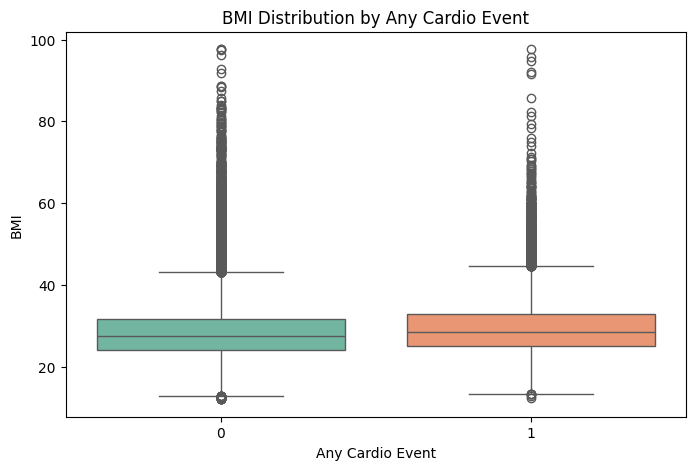

BMI Group Means:
any_cardio_event
0    28.559134
1    29.516733
Name: bmi, dtype: float64


In [ ]:
# Hypothesis 3: Individuals with a higher Body Mass Index (BMI) are more likely to experience a cardiovascular event.
# Create a boxplot to show the distribution of BMI across cardio event groups
plt.figure(figsize=(8, 5))
sns.boxplot(x=heart_risk_data["any_cardio_event"],
            y=heart_risk_data["bmi"],
            hue=heart_risk_data["any_cardio_event"],
            palette='Set2')
plt.legend([], [], frameon=False)  # Hides the redundant legend
plt.title("BMI Distribution by Any Cardio Event")
plt.xlabel("Any Cardio Event")
plt.ylabel("BMI")
plt.show()


# Calculate and print the mean BMI for each cardio event group
bmi_group_means = heart_risk_data.groupby("any_cardio_event")["bmi"].mean()
print("BMI Group Means:")
print(bmi_group_means)


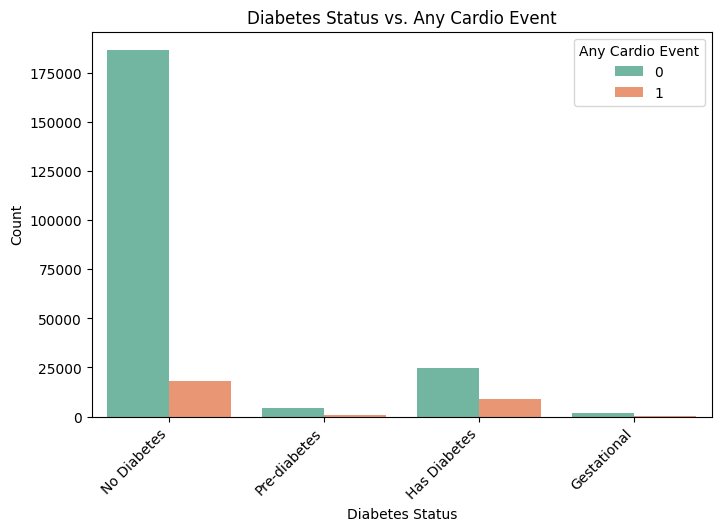

Diabetes Group Means (%):
any_cardio_event  had_diabetes
0                 0               85.656549
                  2               11.404125
                  1                2.089677
                  3                0.849649
1                 0               64.730482
                  2               31.814155
                  1                2.984017
                  3                0.471347
Name: proportion, dtype: float64


In [ ]:
#Hypothesis 4: Individuals with diabetes (including gestational or pre-diabetic conditions) have a higher risk of experiencing a cardiovascular event.
# Create a count plot to display the distribution of diabetes status across cardio event groups
plt.figure(figsize=(8, 5))
sns.countplot(x=heart_risk_data["had_diabetes"], hue=heart_risk_data["any_cardio_event"], palette="Set2")
plt.title("Diabetes Status vs. Any Cardio Event")
plt.xlabel("Diabetes Status")
plt.ylabel("Count")
plt.legend(title="Any Cardio Event")

# Get the current x-axis tick locations and labels
x_ticks = plt.gca().get_xticks()
x_ticklabels = plt.gca().get_xticklabels()

# Create a dictionary to map the numerical values to labels
diabetes_labels = {
    0: 'No Diabetes',
    1: 'Pre-diabetes',
    2: 'Has Diabetes',
    3: 'Gestational'
}

# Replace numerical labels with descriptive labels using the mapping dictionary
x_ticklabels_updated = [diabetes_labels.get(int(label.get_text()), label.get_text()) for label in x_ticklabels]

# Set the updated x-axis tick labels
plt.gca().set_xticklabels(x_ticklabels_updated, rotation=45, ha="right")  # Adjust rotation and alignment if needed

plt.show()

# Calculate and print the percentage of individuals with different diabetes statuses in each group
diabetes_group_means = heart_risk_data.groupby("any_cardio_event")["had_diabetes"].value_counts(normalize=True) * 100
print("Diabetes Group Means (%):")
print(diabetes_group_means)

## Lifestyle Factors

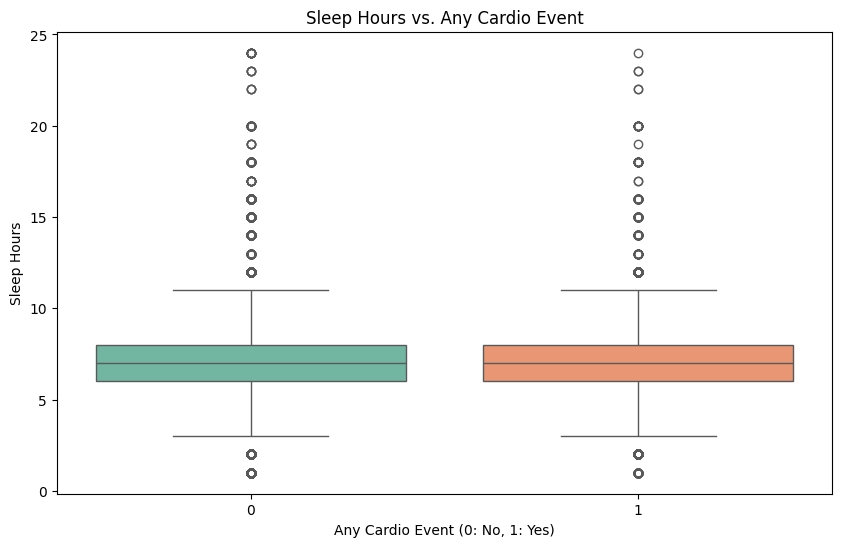

Mean Sleep Hours by Cardio Event Group:
any_cardio_event
0    7.014017
1    7.076975
Name: sleep_hours, dtype: float64


In [ ]:
# Hypothesis : Individuals with cardio events tend to have fewer sleep hours
plt.figure(figsize=(10, 6))  # Adjust figure size if needed

# Create a box plot to visualize the relationship
sns.boxplot(x='any_cardio_event', y='sleep_hours', data=heart_risk_data, palette='Set2')
plt.title('Sleep Hours vs. Any Cardio Event')
plt.xlabel('Any Cardio Event (0: No, 1: Yes)')
plt.ylabel('Sleep Hours')
plt.show()

# Calculate and print the mean sleep hours for each cardio event group
sleep_hours_means = heart_risk_data.groupby("any_cardio_event")["sleep_hours"].mean()
print("Mean Sleep Hours by Cardio Event Group:")
print(sleep_hours_means)

# Perform a statistical test (e.g., t-test) to assess the significance of the difference
# from scipy import stats
# group_0 = heart_risk_data[heart_risk_data['any_cardio_event'] == 0]['sleep_hours']
# group_1 = heart_risk_data[heart_risk_data['any_cardio_event'] == 1]['sleep_hours']
# t_statistic, p_value = stats.ttest_ind(group_0, group_1)

# print("\nIndependent t-test results:")
# print(f"t-statistic: {t_statistic}")
# print(f"p-value: {p_value}")

### Based on the very low p-value, we can reject the null hypothesis and conclude that there is a statistically significant difference in sleep hours between individuals with and without cardio events.
#The negative t-statistic suggests that, on average, individuals with cardio events tend to have fewer sleep hours compared to those without cardio events.

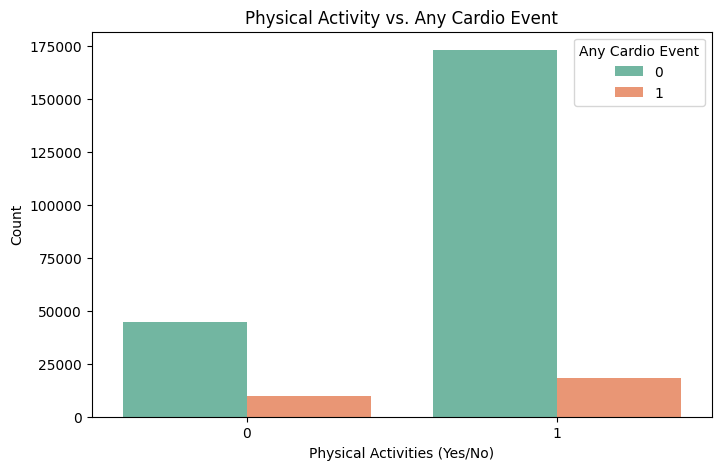

Physical Activity Group Means (%):
any_cardio_event  physical_activities
0                 1                      79.431608
                  0                      20.568392
1                 1                      64.865152
                  0                      35.134848
Name: proportion, dtype: float64


In [ ]:
#Hypothesis : Lower levels of physical activity are associated with a higher risk of cardiovascular events.
# Create a count plot to visualize physical activity distribution across cardio event groups
plt.figure(figsize=(8, 5))
sns.countplot(x=heart_risk_data["physical_activities"], hue=heart_risk_data["any_cardio_event"], palette='Set2')
plt.title("Physical Activity vs. Any Cardio Event")
plt.xlabel("Physical Activities (Yes/No)")
plt.ylabel("Count")
plt.legend(title="Any Cardio Event")
plt.show()

# Calculate and print the percentage of individuals who are physically active in each group
physical_activity_group_means = heart_risk_data.groupby("any_cardio_event")["physical_activities"].value_counts(normalize=True) * 100
print("Physical Activity Group Means (%):")
print(physical_activity_group_means)

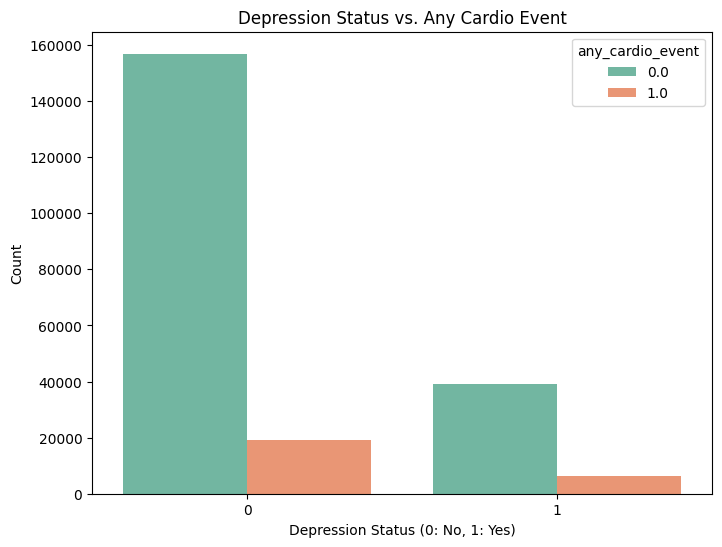

Percentage distribution of individuals with depressive disorder in each cardio event group (%):


any_cardio_event  had_depressive_disorder
0.0               0                          80.063793
                  1                          19.936207
1.0               0                          75.056840
                  1                          24.943160
Name: proportion, dtype: float64

In [69]:
#Hypothesis 7: Individuals with Mental disorder have a significantly increased risk of experiencing a cardiovascular events.
plt.figure(figsize=(8, 6))
sns.countplot(x='had_depressive_disorder', hue='any_cardio_event', data=heart_risk_data, palette='Set2')
plt.title('Depression Status vs. Any Cardio Event')
plt.xlabel('Depression Status (0: No, 1: Yes)')
plt.ylabel('Count')
plt.show()

# Calculate and print the percentage of individuals with depressive disorder in each cardio event group
depressive_disorder_pct = heart_risk_data.groupby("any_cardio_event")["had_depressive_disorder"].value_counts(normalize=True) * 100
print("Percentage distribution of individuals with depressive disorder in each cardio event group (%):")
depressive_disorder_pct

# from scipy.stats import chi2_contingency

# # Create a contingency table
# contingency_table = pd.crosstab(heart_risk_data['had_depressive_disorder'], heart_risk_data['any_cardio_event'])

# # Perform the Chi-squared test
# chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

# # Print the results
# print("Chi-squared statistic:", chi2_stat)
# print("P-value:", p_value)
# print("Degrees of freedom:", dof)
# print("Expected frequencies:", expected)

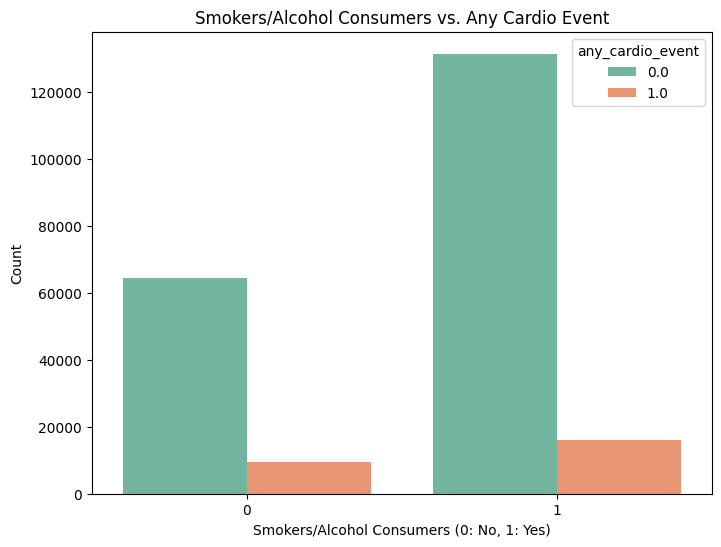

Percentage distribution of alcohol drinkers in each cardio event group (%):


any_cardio_event  alcohol_or_smoke_habit
0.0               1                         67.099952
                  0                         32.900048
1.0               1                         62.548020
                  0                         37.451980
Name: proportion, dtype: float64

In [70]:
# Hypothesis: Individuals with smoking or driking habits have a increased risk of experiencing a cardiovascular events.

# Create the 'alcohol_or_smoke_habit' column based on 'alcohol_drinkers' and 'smoking_status'
heart_risk_data['alcohol_or_smoke_habit'] = 0  # Initialize to 0 (no habit)
heart_risk_data.loc[(heart_risk_data['alcohol_drinkers'] == 1) | (heart_risk_data['smoking_status'] == 1), 'alcohol_or_smoke_habit'] = 1 # Set to 1 if either is present

plt.figure(figsize=(8, 6))
sns.countplot(x='alcohol_or_smoke_habit', hue='any_cardio_event', data=heart_risk_data, palette='Set2')
plt.title('Smokers/Alcohol Consumers vs. Any Cardio Event')
plt.xlabel('Smokers/Alcohol Consumers (0: No, 1: Yes)')
plt.ylabel('Count')
plt.show()

# Calculate and print the percentage of alcohol drinkers in each cardio event group
alcohol_smoke_pct = heart_risk_data.groupby("any_cardio_event")["alcohol_or_smoke_habit"].value_counts(normalize=True) * 100
print("Percentage distribution of alcohol drinkers in each cardio event group (%):")
alcohol_smoke_pct



# ML Modeling

In [82]:
heart_risk_data.columns

Index(['state', 'sex', 'general_health', 'physical_health_days',
       'mental_health_days', 'physical_activities', 'sleep_hours',
       'had_asthma', 'had_skin_cancer', 'had_copd', 'had_depressive_disorder',
       'had_kidney_disease', 'had_arthritis', 'had_diabetes',
       'deaf_or_hard_of_hearing', 'blind_or_vision_difficulty', 'chest_scan',
       'race_ethnicity_category', 'age_category', 'bmi', 'alcohol_drinkers',
       'covid_pos', 'smoking_status', 'diff_day_2_day_activity',
       'any_cardio_event', 'alcohol_or_smoke_habit'],
      dtype='object')

In [83]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, roc_curve, auc, roc_auc_score,confusion_matrix,classification_report
)
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import roc_curve, auc
import statsmodels.api as sm
import pandas as pd

# LogReg and RF Model - Undersampled

In [87]:
X=heart_risk_data[[ 'sex','age_category','race_ethnicity_category',
            'physical_activities', 'sleep_hours', 'bmi','alcohol_or_smoke_habit','had_depressive_disorder','had_asthma',
    'had_skin_cancer',
             'had_arthritis', 'had_diabetes','had_copd','any_cardio_event'#,'physical_health_days'
 ]]

y = X['any_cardio_event']  # Target
X = X.drop('any_cardio_event', axis=1)  # Features

# # Calculate scale_pos_weight for XGBoost
# negative_class_count = (y == 0).sum()
# positive_class_count = (y == 1).sum()
# scale_pos_weight = negative_class_count / positive_class_count

models = [
    LogisticRegression(class_weight='balanced', random_state=42),
    RandomForestClassifier(class_weight='balanced', random_state=42),
    #XGBClassifier(scale_pos_weight=scale_pos_weight, random_state=42, eval_metric="logloss")
]
X.columns

Index(['sex', 'age_category', 'race_ethnicity_category', 'physical_activities',
       'sleep_hours', 'bmi', 'alcohol_or_smoke_habit',
       'had_depressive_disorder', 'had_asthma', 'had_skin_cancer',
       'had_arthritis', 'had_diabetes', 'had_copd'],
      dtype='object')

In [88]:
# Add a constant to the independent variable
X = sm.add_constant(X)
# Ensure 'any_cardio_event' column contains only 0s and 1s
y = y.astype(int)  # Convert to integer if it's not already
y = y.clip(0, 1)   # Force values to be within 0 and 1

# Fit the logistic regression model
model = sm.Logit(y, X).fit()

# Get p-values
p_values = model.pvalues

# Print p-values
print(p_values)

# Print model summary
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.297089
         Iterations 8
const                       0.000000e+00
sex                         0.000000e+00
age_category                0.000000e+00
race_ethnicity_category     3.391350e-09
physical_activities        4.168772e-102
sleep_hours                 1.230022e-11
bmi                         3.862202e-16
alcohol_or_smoke_habit      9.155565e-24
had_depressive_disorder    1.031883e-132
had_asthma                  4.134341e-28
had_skin_cancer             3.163015e-08
had_arthritis              5.533750e-144
had_diabetes                0.000000e+00
had_copd                    0.000000e+00
dtype: float64
                           Logit Regression Results                           
Dep. Variable:       any_cardio_event   No. Observations:               221455
Model:                          Logit   Df Residuals:                   221441
Method:                           MLE   Df Model:                       

<BarContainer object of 14 artists>

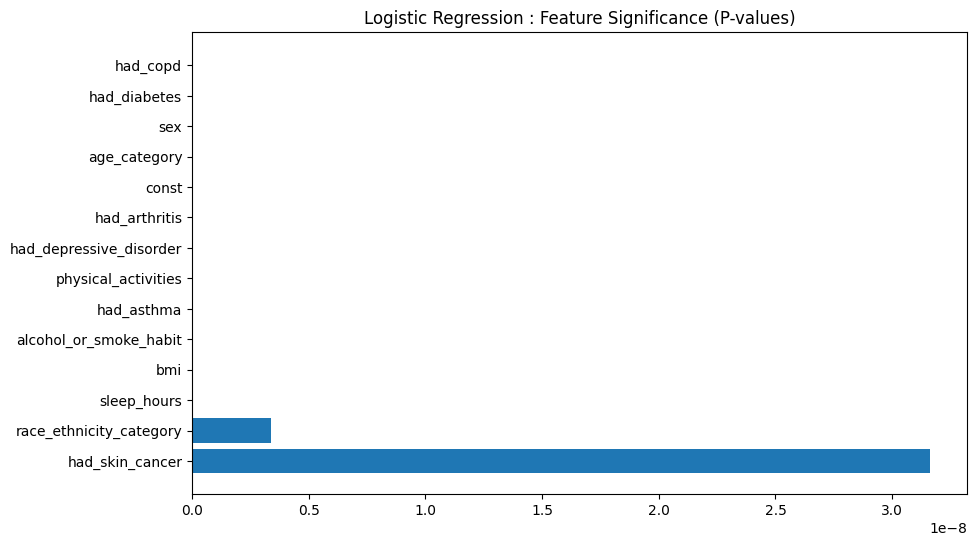

In [89]:
# plot P-values in descending bar chart and add title

plt.figure(figsize=(10, 6))
plt.title('Logistic Regression : Feature Significance (P-values)')
p_values_sorted = p_values.sort_values(ascending=False)
plt.barh(p_values_sorted.index, p_values_sorted)


🔹 Top 5 Features Based on Logistic Regression Coefficients:
   had_copd: 0.8908
   sex: 0.6764
   had_depressive_disorder: 0.4583
   had_arthritis: 0.4241
   had_diabetes: 0.3810

🔹 Model: LogisticRegression
   Coefficients: [[ 0.67643958  0.29374558 -0.03451939 -0.31643837 -0.03770701  0.01190011
  -0.14578581  0.45829307  0.24289722  0.16289023  0.42408464  0.38095093
   0.8907972 ]]
   Variables: ['sex' 'age_category' 'race_ethnicity_category' 'physical_activities'
 'sleep_hours' 'bmi' 'alcohol_or_smoke_habit' 'had_depressive_disorder'
 'had_asthma' 'had_skin_cancer' 'had_arthritis' 'had_diabetes' 'had_copd']
   Intercept: [-2.9708052]
   Accuracy: 0.7271
   Precision: 0.7112
   Recall: 0.7593
   Overall FPR: 0.3048
   Overall TPR: 0.7593
   AUC Score: 0.7954
   CV Scores: [0.72522466 0.72914821 0.72180737 0.72493671 0.72468354]
   Mean CV Score: 0.7252


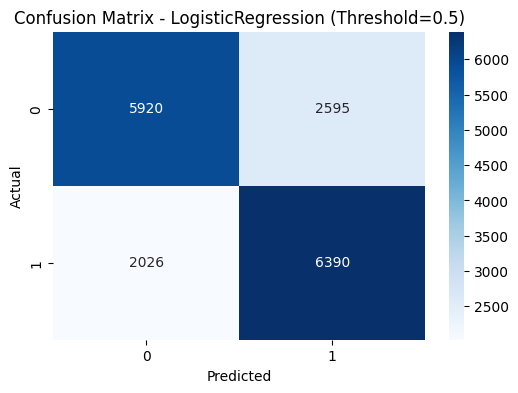

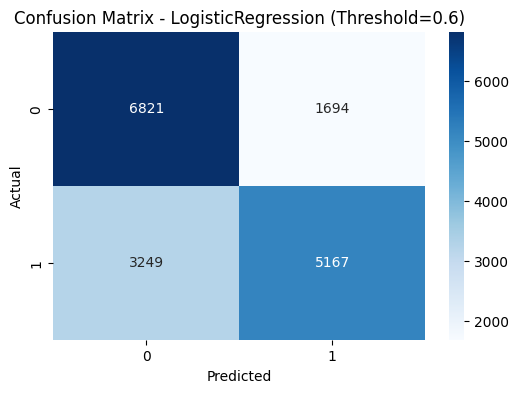

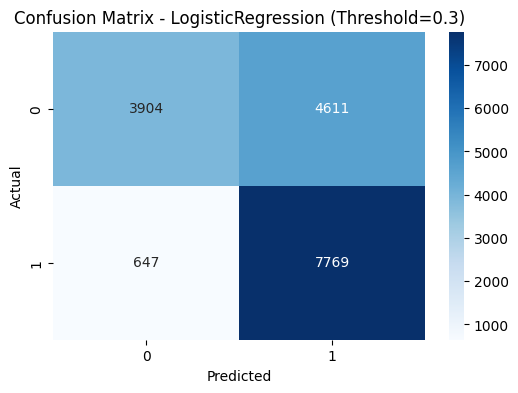

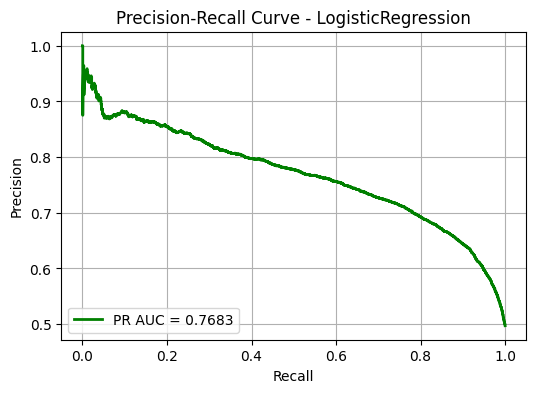

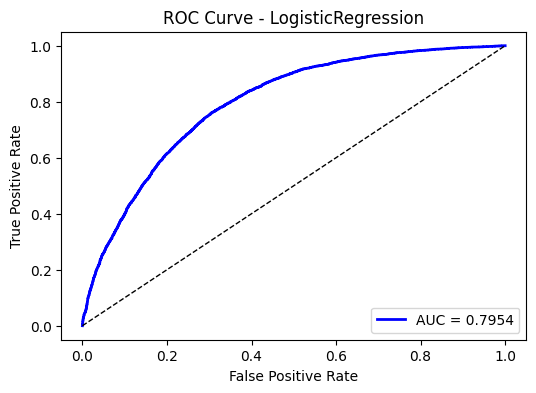

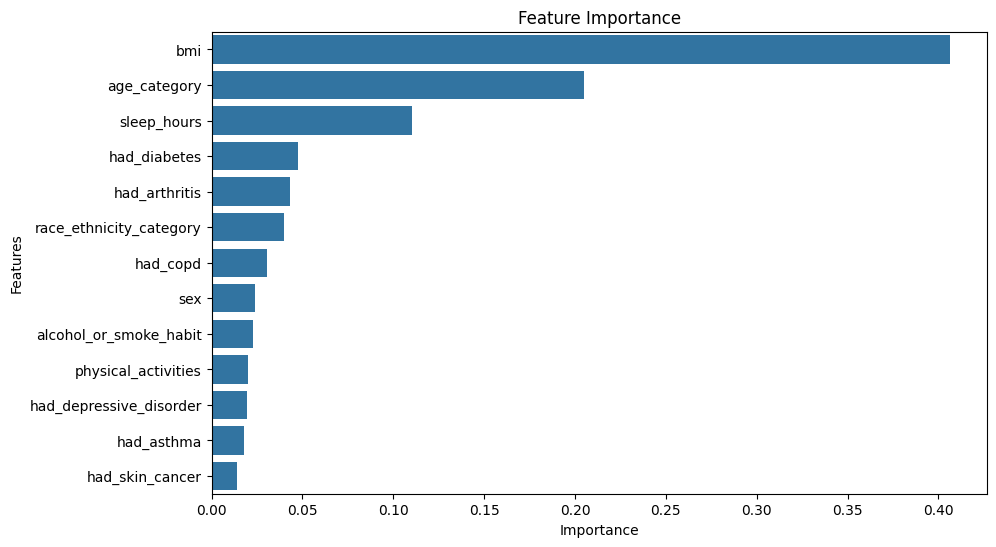


🔹 Model: RandomForestClassifier
   Coefficients: [0.02387335 0.20507527 0.03962539 0.02026615 0.11022657 0.40627696
 0.02287804 0.01929577 0.01761088 0.0138114  0.04315346 0.04731256
 0.03059421]
   Variables: Index(['sex', 'age_category', 'race_ethnicity_category', 'physical_activities',
       'sleep_hours', 'bmi', 'alcohol_or_smoke_habit',
       'had_depressive_disorder', 'had_asthma', 'had_skin_cancer',
       'had_arthritis', 'had_diabetes', 'had_copd'],
      dtype='object')
   Intercept: None
   Accuracy: 0.6894
   Precision: 0.6783
   Recall: 0.7135
   Overall FPR: 0.3345
   Overall TPR: 0.7135
   AUC Score: 0.7527
   CV Scores: [0.67877484 0.68991267 0.68687508 0.68670886 0.68518987]
   Mean CV Score: 0.6855


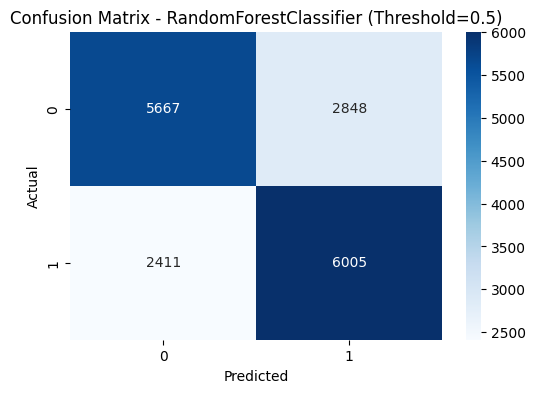

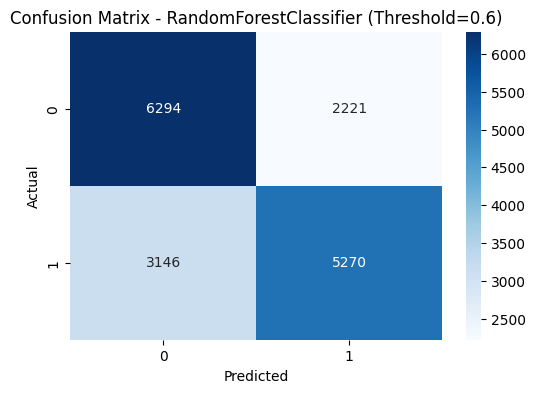

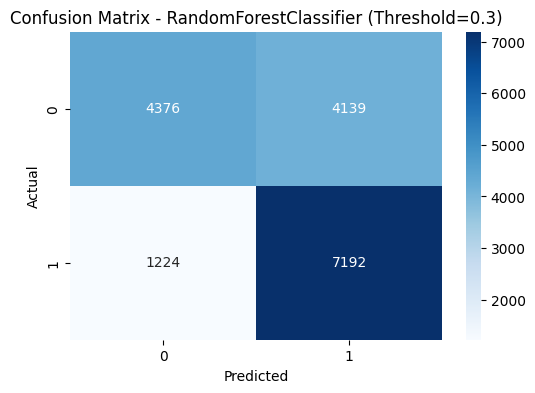

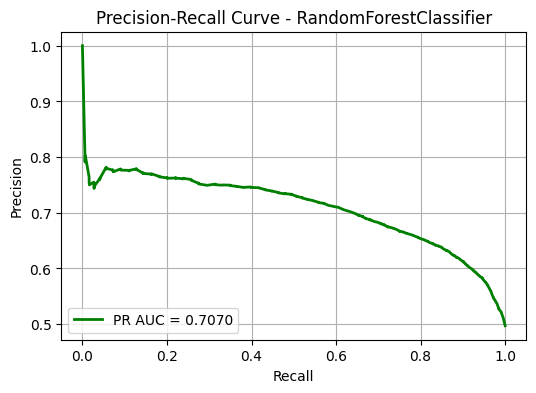

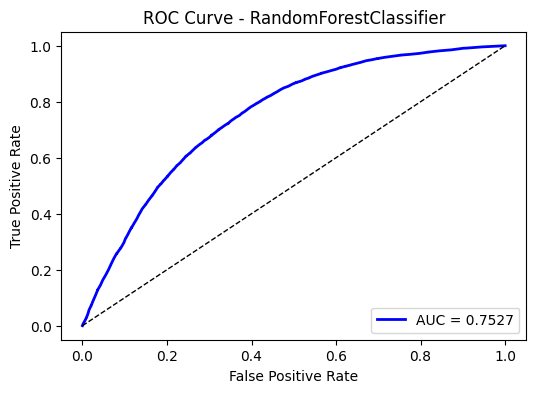

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_curve, auc, confusion_matrix,precision_recall_curve, average_precision_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Undersample the majority class
undersampler = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = undersampler.fit_resample(X, y)

# Step 2: Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=78)

# Step 3: Convert target variable to integer
y_train = y_train.astype(int)
y_test = y_test.astype(int)

results = {}

for model in models:
    model_name = model.__class__.__name__
    model.fit(X_train, y_train)  # Train model

    # Extract coefficients or feature importance
    if model_name == "LogisticRegression":
        coefficients = model.coef_
        variables = model.feature_names_in_
        intercept = model.intercept_

        # Extract absolute coefficient values and sort them
        feature_importance = abs(coefficients[0])
        feature_names = variables

        # Get top 5 features
        top_5_indices = np.argsort(feature_importance)[-5:][::-1]
        top_5_features = [(feature_names[i], coefficients[0][i]) for i in top_5_indices]

        print("\n🔹 Top 5 Features Based on Logistic Regression Coefficients:")
        for feature, coef in top_5_features:
            print(f"   {feature}: {coef:.4f}")
    else:
        coefficients = model.feature_importances_
        variables = X.columns
        intercept = None

        feature_importances = pd.Series(model.feature_importances_, index=X.columns)
        sorted_feature_importances = feature_importances.sort_values(ascending=False)

        plt.figure(figsize=(10, 6))
        sns.barplot(x=sorted_feature_importances, y=sorted_feature_importances.index)
        plt.title('Feature Importance')
        plt.xlabel('Importance')
        plt.ylabel('Features')
        plt.show()

    # Print model details
    print(f"\n🔹 Model: {model_name}")
    print(f"   Coefficients: {coefficients}")
    print(f"   Variables: {variables}")
    print(f"   Intercept: {intercept}")

    # Predictions and probability scores
    y_prob = model.predict_proba(X_test)[:, 1]

    # Default threshold (0.5)
    y_pred_05 = (y_prob >= 0.5).astype(int)

    # Custom threshold (0.6)
    y_pred_06 = (y_prob >= 0.6).astype(int)

    # Custom threshold (0.3)
    y_pred_03 = (y_prob >= 0.3).astype(int)

    # Compute evaluation metrics
    accuracy = accuracy_score(y_test, y_pred_05)
    precision = precision_score(y_test, y_pred_05)
    recall = recall_score(y_test, y_pred_05)
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)

    # Compute overall FPR (False Positive Rate)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred_05).ravel()
    overall_fpr = fp / (fp + tn)
    overall_tpr = tp / (tp + fn)

    results[model_name] = accuracy
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')

    print(f"   Accuracy: {accuracy:.4f}")
    print(f"   Precision: {precision:.4f}")
    print(f"   Recall: {recall:.4f}")
    print(f"   Overall FPR: {overall_fpr:.4f}")
    print(f"   Overall TPR: {overall_tpr:.4f}")
    print(f"   AUC Score: {roc_auc:.4f}")
    print(f"   CV Scores: {scores}")
    print(f"   Mean CV Score: {scores.mean():.4f}")

    # Confusion Matrices for Different Thresholds
    thresholds = [0.5, 0.6, 0.3]
    y_preds = [y_pred_05, y_pred_06, y_pred_03]

    for thr, y_pred_thr in zip(thresholds, y_preds):
        cm = confusion_matrix(y_test, y_pred_thr)
        plt.figure(figsize=(6,4))
        sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
        plt.title(f"Confusion Matrix - {model_name} (Threshold={thr})")
        plt.show()

    # Precision-Recall Curve
    precision_vals, recall_vals, _ = precision_recall_curve(y_test, y_prob)
    pr_auc = average_precision_score(y_test, y_prob)

    plt.figure(figsize=(6, 4))
    plt.plot(recall_vals, precision_vals, color="green", lw=2, label=f"PR AUC = {pr_auc:.4f}")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title(f"Precision-Recall Curve - {model_name}")
    plt.legend(loc="lower left")
    plt.grid()
    plt.show()

    # ROC Curve with AUC
    plt.figure(figsize=(6, 4))
    plt.plot(fpr, tpr, color="blue", lw=2, label=f"AUC = {roc_auc:.4f}")
    plt.plot([0, 1], [0, 1], "k--", lw=1)  # Random guessing reference line
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"ROC Curve - {model_name}")
    plt.legend(loc="lower right")
    plt.show()


In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

# Get predicted probabilities for "Yes" class
y_probs = model.predict_proba(X_test)[:, 1]

# Define a range of threshold values to test
thresholds = np.arange(0.1, 0.9, 0.05)  # Testing from 0.1 to 0.9 in 0.05 increments

# Store results
results = []

for thresh in thresholds:
    y_pred_thresh = (y_probs >= thresh).astype(int)
    cm = confusion_matrix(y_test, y_pred_thresh)
    FN = cm[1, 0]  # False Negatives (Q3)
    FP = cm[0, 1]  # False Positives (Q2)
    precision = precision_score(y_test, y_pred_thresh)
    recall = recall_score(y_test, y_pred_thresh)
    f1 = f1_score(y_test, y_pred_thresh)

    results.append((thresh, FN, FP, precision, recall, f1))

# Convert results to a DataFrame
import pandas as pd
results_df = pd.DataFrame(results, columns=["Threshold", "False Negatives (Q3)", "False Positives (Q2)", "Precision", "Recall", "F1-Score"])

# Display the results
print(results_df)

    Threshold  False Negatives (Q3)  False Positives (Q2)  Precision  \
0        0.10                   352                  6077   0.570257   
1        0.15                   576                  5403   0.592011   
2        0.20                   791                  4907   0.608442   
3        0.25                  1008                  4481   0.623097   
4        0.30                  1261                  4069   0.637473   
5        0.35                  1543                  3723   0.648641   
6        0.40                  1835                  3396   0.659617   
7        0.45                  2154                  3091   0.669518   
8        0.50                  2471                  2797   0.680050   
9        0.55                  2832                  2482   0.692289   
10       0.60                  3225                  2167   0.705491   
11       0.65                  3707                  1847   0.718273   
12       0.70                  4253                  1518   0.73

# PCA MODEL

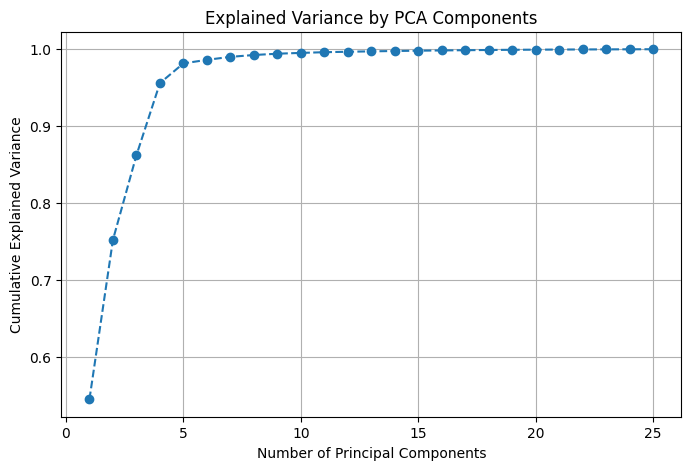

Optimal number of components: 5

Top Principal Components:
      state       sex  general_health  physical_health_days  \
0  0.999946 -0.000179       -0.000105              0.002987   
1 -0.003997 -0.004126       -0.054172              0.737925   
2  0.002832 -0.003091        0.027668             -0.632472   
3 -0.007532  0.001669       -0.017356             -0.207070   
4 -0.002639 -0.011058       -0.038078             -0.095653   

   mental_health_days  physical_activities  sleep_hours  had_asthma  \
0            0.000800             0.000126     0.000931    0.000141   
1            0.651956            -0.010352    -0.017962    0.005990   
2            0.745823             0.007085    -0.015808    0.000250   
3           -0.007005            -0.005899    -0.009704    0.003898   
4            0.130640            -0.012111     0.052011   -0.004635   

   had_skin_cancer  had_copd  ...  blind_or_vision_difficulty  chest_scan  \
0        -0.000043 -0.000043  ...                    0.000

In [ ]:
# PCA
from sklearn.decomposition import PCA

# Selecting Features (Excluding Target Variable)
PCA_x = heart_risk_data.drop(columns=['any_cardio_event'])  # Exclude target
PCA_y = heart_risk_data['any_cardio_event']

# Apply PCA
pca = PCA(n_components=None)  # Keep all components initially
X_pca = pca.fit_transform(PCA_x)

# Explained Variance
explained_variance = np.cumsum(pca.explained_variance_ratio_)

# Plot Explained Variance
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by PCA Components')
plt.grid()
plt.show()

# Choose Optimal Number of Components (e.g., 95% variance)
optimal_components = np.argmax(explained_variance >= 0.98) + 1
print(f"Optimal number of components: {optimal_components}")

# Apply PCA with selected number of components
pca_final = PCA(n_components=optimal_components)
X_pca_final = pca_final.fit_transform(PCA_x)

# Print top components and their contribution
components_df = pd.DataFrame(pca_final.components_, columns=PCA_x.columns)
print("\nTop Principal Components:")
print(components_df.head())

# # If you want to display the most important original features for each principal component:
# top_n = 5  # Show top 5 contributing features for each PC
# for i in range(pca_components.shape[0]):
#     top_features = pca_components.iloc[i].abs().sort_values(ascending=False).head(top_n)
#     print(f"\nPrincipal Component {i+1}:")
#     print(top_features)


🔹 Model Accuracy: 0.8803
   Accuracy: 0.8803
   Precision: 0.3663
   Recall: 0.0710
   Overall FPR: 0.0158
   Overall TPR: 0.0710
   AUC Score: 0.7546
   CV Scores: [0.87802753 0.87907301 0.88028926 0.8803183  0.87956321]
   Mean CV Score: 0.8795


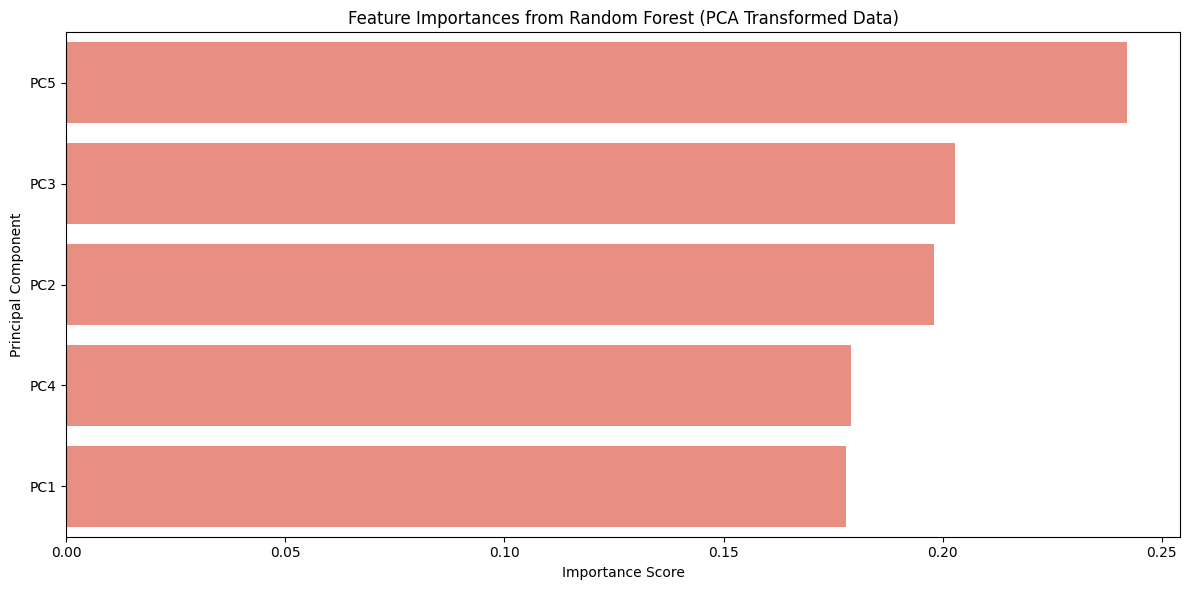

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier


# Step 1: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_pca_final, PCA_y, test_size=0.3, random_state=42)

# Step 2: Train Random Forest Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Step 3: Predictions
y_pred = rf_model.predict(X_test)
y_prob = rf_model.predict_proba(X_test)[:, 1]

# Step 4: Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f"\n🔹 Model Accuracy: {accuracy:.4f}")
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Compute overall FPR (False Positive Rate)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
overall_fpr = fp / (fp + tn)
overall_tpr = tp / (tp + fn)

scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='accuracy')

print(f"   Accuracy: {accuracy:.4f}")
print(f"   Precision: {precision:.4f}")
print(f"   Recall: {recall:.4f}")
print(f"   Overall FPR: {overall_fpr:.4f}")
print(f"   Overall TPR: {overall_tpr:.4f}")
print(f"   AUC Score: {roc_auc:.4f}")
print(f"   CV Scores: {scores}")
print(f"   Mean CV Score: {scores.mean():.4f}")

# Step 5: Feature Importance Analysis
importances = rf_model.feature_importances_
pc_labels = [f"PC{i+1}" for i in range(optimal_components)]

# Step 6: Create DataFrame for Plotting
importance_df = pd.DataFrame({
    'Principal Component': pc_labels,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Step 7: Plot Feature Importances
plt.figure(figsize=(12, 6))
sns.barplot(data=importance_df, x='Importance', y='Principal Component', color='salmon')
plt.title("Feature Importances from Random Forest (PCA Transformed Data)")
plt.xlabel("Importance Score")
plt.ylabel("Principal Component")
plt.tight_layout()
plt.show()

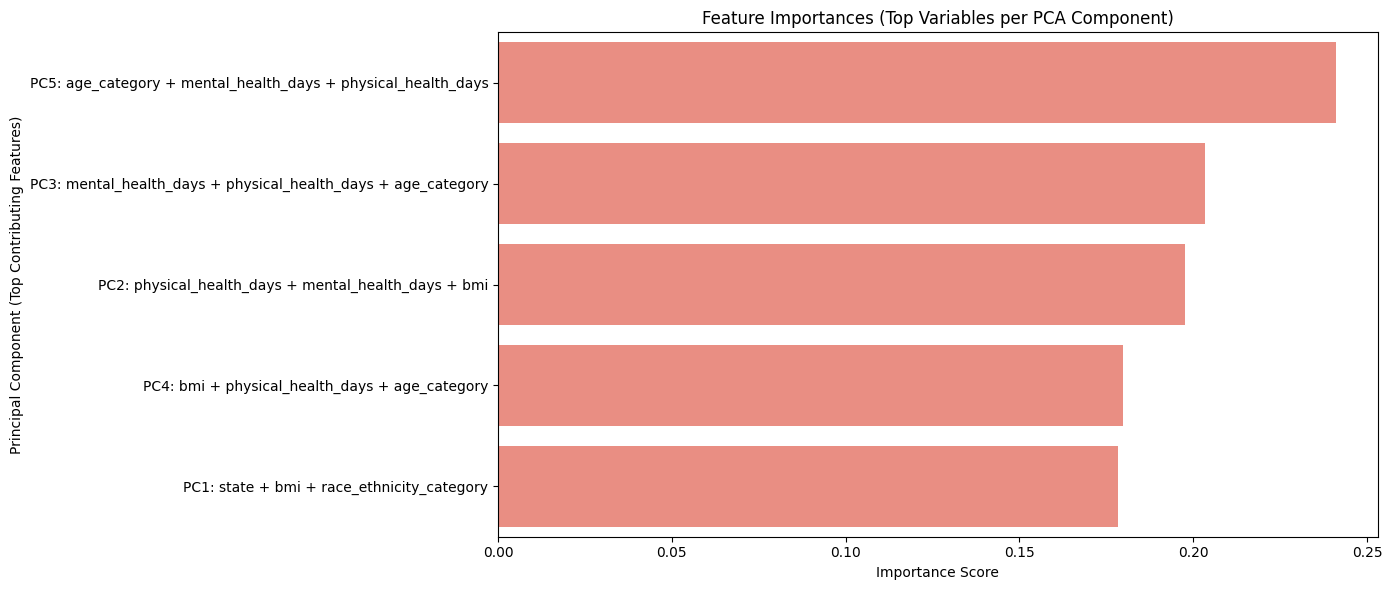

In [ ]:
# Original feature names
original_features = df_cleaned.columns

# Get top contributing features for each PC
def top_features_for_pc(pca, feature_names, top_n=3):
    pc_feature_names = []
    for i, component in enumerate(pca.components_):
        top_indices = np.abs(component).argsort()[-top_n:][::-1]
        top_features = [feature_names[j] for j in top_indices]
        pc_feature_names.append(f"PC{i+1}: " + " + ".join(top_features))
    return pc_feature_names

# Generate custom PC names
custom_pc_labels = top_features_for_pc(pca_final, original_features, top_n=3)

# Assuming rf_model is your trained RandomForestClassifier
importances = rf_model.feature_importances_ # Changed rf to rf_model

# Create DataFrame for plotting
importance_df = pd.DataFrame({
    'Principal Component': custom_pc_labels,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(14, 6))
sns.barplot(data=importance_df, x='Importance', y='Principal Component', color='salmon')
plt.title("Feature Importances (Top Variables per PCA Component)")
plt.xlabel("Importance Score")
plt.ylabel("Principal Component (Top Contributing Features)")
plt.tight_layout()
plt.show()

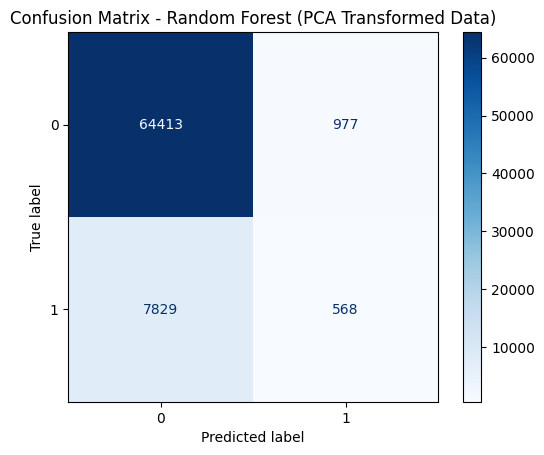

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Step 4.1: Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Step 4.2: Plot Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - Random Forest (PCA Transformed Data)")
plt.show()


🔹 Model Accuracy (threshold = 0.3): 0.8373


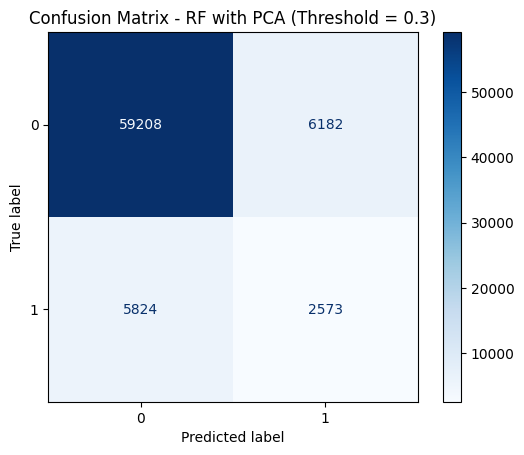

In [ ]:
# Step 1: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_pca_final, PCA_y, test_size=0.3, random_state=42)

# Step 2: Train Random Forest Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Step 3: Predictions with threshold = 0.3
y_proba = rf_model.predict_proba(X_test)[:, 1]         # Probability for class 1
threshold = 0.3
y_pred_thresh = (y_proba >= threshold).astype(int)     # Apply threshold

# Step 4: Model Evaluation
accuracy = accuracy_score(y_test, y_pred_thresh)
print(f"\n🔹 Model Accuracy (threshold = 0.3): {accuracy:.4f}")

# Step 5: Confusion Matrix
cm = confusion_matrix(y_test, y_pred_thresh)

# Step 6: Plot Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - RF with PCA (Threshold = 0.3)")
plt.show()